# 2. Naive Bayes

### Încărcarea imaginilor și a etichetelor

In [45]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')

train_images = np.loadtxt('data/train_images.txt').astype(np.uint8) 
train_labels = np.loadtxt('data/train_labels.txt').astype(np.uint8) 

test_images = np.loadtxt('data/test_images.txt').astype(np.uint8) 
test_labes = np.loadtxt('data/test_labels.txt').astype(np.uint8)


### Afișarea unei imagini

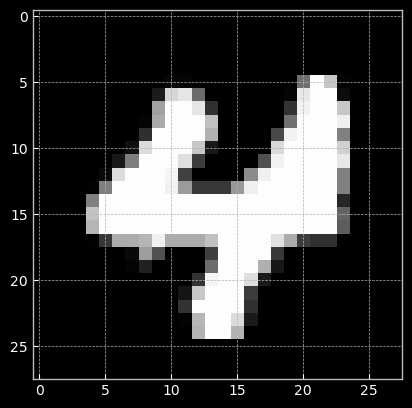

In [33]:
image = train_images[0, :] # prima imagine
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()


### Discretizarea datelor

In [60]:
def values_to_bins(data, bins):
    
    return np.digitize(data, bins) - 1  # scadem 1 din fiecare element ca sa avem indexarea de la 0


num_bins = 5

bins = np.linspace(start=0, stop=255, num=num_bins) 

x_train = values_to_bins(train_images, bins)
x_test = values_to_bins(test_images, bins)


### Antrenarea modelului

In [61]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train, train_labels)

naive_bayes_model.score(x_test, test_labes)

0.836

### Testarea clasificatorului pentru num_bins = {3, 5, 7, 9, 11}

In [53]:
for num_bins in range(3, 12, 2):

    bins = np.linspace(start=0, stop=255, num=num_bins) 
    
    x_train = values_to_bins(train_images, bins)
    x_test = values_to_bins(test_images, bins)
    
    naive_bayes_model.fit(x_train, train_labels)
    acc = naive_bayes_model.score(x_test, test_labes)
    
    print(f"Acuratete {acc} pentru num_bins = {num_bins}")

Acuratete 0.826 pentru num_bins = 3
Acuratete 0.836 pentru num_bins = 5
Acuratete 0.842 pentru num_bins = 7
Acuratete 0.842 pentru num_bins = 9
Acuratete 0.842 pentru num_bins = 11


### Afișarea unor exemple misclasate

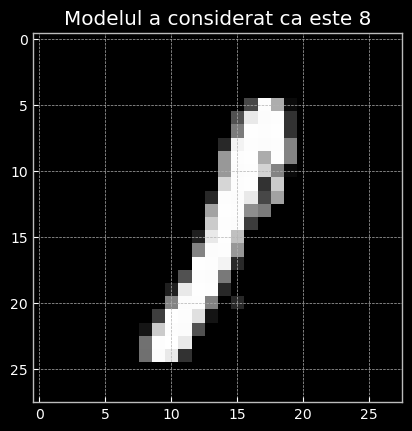

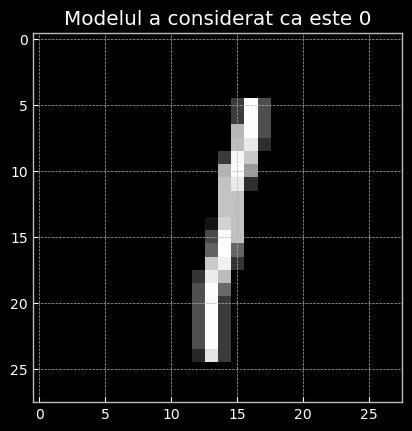

In [64]:
predictions = naive_bayes_model.predict(x_test)
missclassed_num = 2

for i in range(len(predictions)):
    if predictions[i] != test_labes[i]:
        image = train_images[i, :] 
        image = np.reshape(image, (28, 28))
        plt.imshow(image.astype(np.uint8), cmap='gray')
        plt.title(f"Modelul a considerat ca este {predictions[i]}")
        plt.show()
        
        missclassed_num -= 1
        
    if not missclassed_num:
        break
    
    

### Matricea de confuzie

In [66]:
def confusion_matrix(y_true, y_pred):
    
    num_classes = max(y_true.max(), y_pred.max()) + 1
    
    confusion_matrix = np.zeros(shape=(num_classes, num_classes), dtype= np.uint32)
    
    for i in range(len(y_true)):
        confusion_matrix[int(y_true[i])][int(y_pred[i])] += 1
        
    return confusion_matrix

matrix = confusion_matrix(test_labes, predictions)

matrix

array([[51,  0,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 2,  1, 50,  1,  1,  0,  1,  1,  1,  0],
       [ 0,  0,  1, 49,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  2, 11],
       [ 1,  0,  0,  9,  0, 34,  1,  0,  6,  1],
       [ 1,  1,  0,  0,  1,  0, 43,  0,  2,  0],
       [ 0,  1,  0,  0,  2,  0,  0, 41,  0,  6],
       [ 0,  1,  3,  3,  1,  1,  1,  1, 34,  1],
       [ 0,  0,  1,  1,  5,  0,  0,  0,  0, 35]], dtype=uint32)